# Assignment 2

### Name:-Prachi Balaji Upare
### Roll No.:- 2337055
### Branch:- C
### Title:
Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import statistics
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

## Find Null value and fix it 

In [3]:
Dist={"Roll No":[1,2,3,4,5],
      "Name":['Shruti','Sejal','Anjali','Siddhi','Prachi'],
      "Maths Marks":[60,70,80,90,np.nan],
      "English Marks":[70,80,90,np.nan,60],
      "Science Marks":[80,90,np.nan,60,70],
      "History Marks":[90,np.nan,60,70,80],
      "Geog Marks":[np.nan,60,70,80,90]}

df=pd.DataFrame(Dist)
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,NaN
1,2,Sejal,70.0,80.0,90.0,NaN,60.0
2,3,Anjali,80.0,90.0,NaN,60.0,70.0
3,4,Siddhi,90.0,NaN,60.0,70.0,80.0
4,5,Prachi,NaN,60.0,70.0,80.0,90.0


In [4]:
df.isnull()

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,False,False,False


In [5]:
df.isnull().sum()

Roll No          0
Name             0
Maths Marks      1
English Marks    1
Science Marks    1
History Marks    1
Geog Marks       1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Roll No        5 non-null      int64  
 1   Name           5 non-null      object 
 2   Maths Marks    4 non-null      float64
 3   English Marks  4 non-null      float64
 4   Science Marks  4 non-null      float64
 5   History Marks  4 non-null      float64
 6   Geog Marks     4 non-null      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 408.0+ bytes


In [7]:
bool_series=pd.notnull(df)
bool_series

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,False,True,True
3,True,True,True,False,True,True,True
4,True,True,False,True,True,True,True


In [8]:
df.fillna(60) # direct value

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,60.0
1,2,Sejal,70.0,80.0,90.0,60.0,60.0
2,3,Anjali,80.0,90.0,60.0,60.0,70.0
3,4,Siddhi,90.0,60.0,60.0,70.0,80.0
4,5,Prachi,60.0,60.0,70.0,80.0,90.0


In [9]:
df['Science Marks'].fillna(df['Science Marks'].mean()) #using mean


0    80.0
1    90.0
2    75.0
3    60.0
4    70.0
Name: Science Marks, dtype: float64

In [10]:
df['English Marks'].fillna(df['English Marks'].median()) #using median
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,NaN
1,2,Sejal,70.0,80.0,90.0,NaN,60.0
2,3,Anjali,80.0,90.0,NaN,60.0,70.0
3,4,Siddhi,90.0,NaN,60.0,70.0,80.0
4,5,Prachi,NaN,60.0,70.0,80.0,90.0


In [11]:
df['Geog Marks'].fillna(df['Geog Marks'].mode()) #using mode
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,NaN
1,2,Sejal,70.0,80.0,90.0,NaN,60.0
2,3,Anjali,80.0,90.0,NaN,60.0,70.0
3,4,Siddhi,90.0,NaN,60.0,70.0,80.0
4,5,Prachi,NaN,60.0,70.0,80.0,90.0


In [12]:
df.interpolate(method='linear',limit_direction='forward')

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,NaN
1,2,Sejal,70.0,80.0,90.0,75.0,60.0
2,3,Anjali,80.0,90.0,75.0,60.0,70.0
3,4,Siddhi,90.0,75.0,60.0,70.0,80.0
4,5,Prachi,90.0,60.0,70.0,80.0,90.0


In [13]:
df=df.fillna(method='pad') # using LOCF
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,NaN
1,2,Sejal,70.0,80.0,90.0,90.0,60.0
2,3,Anjali,80.0,90.0,90.0,60.0,70.0
3,4,Siddhi,90.0,90.0,60.0,70.0,80.0
4,5,Prachi,90.0,60.0,70.0,80.0,90.0


In [14]:
df.fillna(method='bfill',inplace=True) # using NOCB
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,60.0
1,2,Sejal,70.0,80.0,90.0,90.0,60.0
2,3,Anjali,80.0,90.0,90.0,60.0,70.0
3,4,Siddhi,90.0,90.0,60.0,70.0,80.0
4,5,Prachi,90.0,60.0,70.0,80.0,90.0


In [15]:
df.replace(to_replace=np.nan,value=85)

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60.0,70.0,80.0,90.0,60.0
1,2,Sejal,70.0,80.0,90.0,90.0,60.0
2,3,Anjali,80.0,90.0,90.0,60.0,70.0
3,4,Siddhi,90.0,90.0,60.0,70.0,80.0
4,5,Prachi,90.0,60.0,70.0,80.0,90.0


In [16]:
Dist={"Roll No":[1,2,3,4,5],
      "Name":['Shruti','Sejal','Anjali','Siddhi','Prachi'],
      "Maths Marks":[60,70,80,90,50],
      "English Marks":[70,80,90,np.nan,60],
      "Science Marks":[80,90,np.nan,60,70],
      "History Marks":[90,np.nan,60,70,80],
      "Geog Marks":[np.nan,60,70,80,90]}

df=pd.DataFrame(Dist)
df

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
0,1,Shruti,60,70.0,80.0,90.0,NaN
1,2,Sejal,70,80.0,90.0,NaN,60.0
2,3,Anjali,80,90.0,NaN,60.0,70.0
3,4,Siddhi,90,NaN,60.0,70.0,80.0
4,5,Prachi,50,60.0,70.0,80.0,90.0


In [17]:
# using dropna() function 
df.dropna()

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
4,5,Prachi,50,60.0,70.0,80.0,90.0


In [18]:
# using dropna() function   
df.dropna(how = 'all',inplace=True)


In [19]:
df.dropna(axis=1)

,Roll No,Name,Maths Marks
0,1,Shruti,60
1,2,Sejal,70
2,3,Anjali,80
3,4,Siddhi,90
4,5,Prachi,50


In [20]:
# making new data frame with dropped NA values
df1=df.dropna(axis=0,how='any')
df1

,Roll No,Name,Maths Marks,English Marks,Science Marks,History Marks,Geog Marks
4,5,Prachi,50,60.0,70.0,80.0,90.0


## Outliers

In [21]:
DF=pd.read_csv("boston_housing.csv") #upload the dataset
DF

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1.Visualization 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dis'>

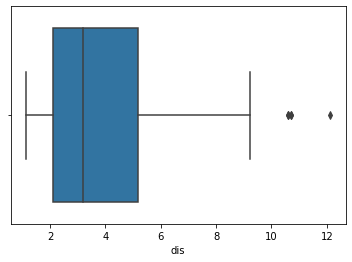

In [22]:

sns.boxplot(DF['dis'])

In [23]:
print("Old shape=",DF.shape)

Old shape= (506, 14)


# 2. IQR(Inter Quartile Range)

In [24]:
q1=np.percentile(DF['dis'],25,interpolation='midpoint')
q1

2.1003499999999997

In [25]:
q3=np.percentile(DF['dis'],75,interpolation='midpoint')
q3

5.16495

In [26]:
IQR=q3-q1
IQR

3.0646000000000004

In [27]:
print("Old shape=",DF.shape)

Old shape= (506, 14)


In [28]:
lower=np.where(DF['dis']<=(q1-1.5*IQR))
lower

(array([], dtype=int64),)

In [29]:
upper=np.where(DF['dis']>=(q3+1.5*IQR))
upper

(array([351, 352, 353, 354, 355], dtype=int64),)

In [30]:
DF.drop(lower[0],inplace=True)

In [31]:
DF.drop(upper[0],inplace=True)

In [32]:
print("New shape:",DF.shape)

New shape: (501, 14)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dis'>

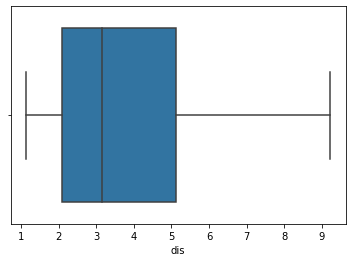

In [33]:

sns.boxplot(DF['dis'])

## Tranformation

In [34]:
min=DF['age'].min()
min

2.9

In [35]:
max=DF['age'].max()
max

100.0

In [36]:
Xnew=(65.2-min)/(max-min)
Xnew

0.6416065911431514

## 3. Z-score 

In [37]:
zscore=stats.zscore(DF['age'])
zscore

0     -0.135909
1      0.354595
2     -0.282702
3     -0.830491
4     -0.529744
         ...   
501    0.003723
502    0.275828
503    0.787813
504    0.726948
505    0.422621
Name: age, Length: 501, dtype: float64

## Skewness

In [38]:
#Skewness is an asymmetry in the distribution of data
#Skewness=3(mean-median)/SD
#range -3 to +3

In [39]:
iris=pd.read_csv("IRIS.csv") #upload the dataset
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
iris['species'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[1,2,3],inplace=True)

In [41]:
iris.skew(axis=1,skipna=True)

0      0.738325
1      0.904161
2      0.745895
3      0.682046
4      0.661624
         ...   
145    0.768184
146    0.786525
147    0.665191
148    0.392508
149    0.463271
Length: 150, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

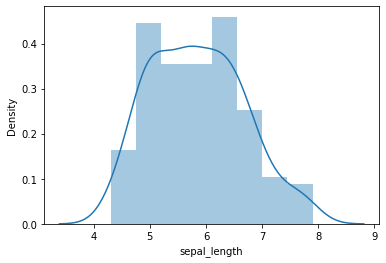

In [42]:
sns.distplot(iris['sepal_length'],hist=True)

In [43]:
old_skew = iris.skew().sort_values(ascending=False)
old_skew

sepal_width     0.334053
sepal_length    0.314911
species         0.000000
petal_width    -0.104997
petal_length   -0.274464
dtype: float64

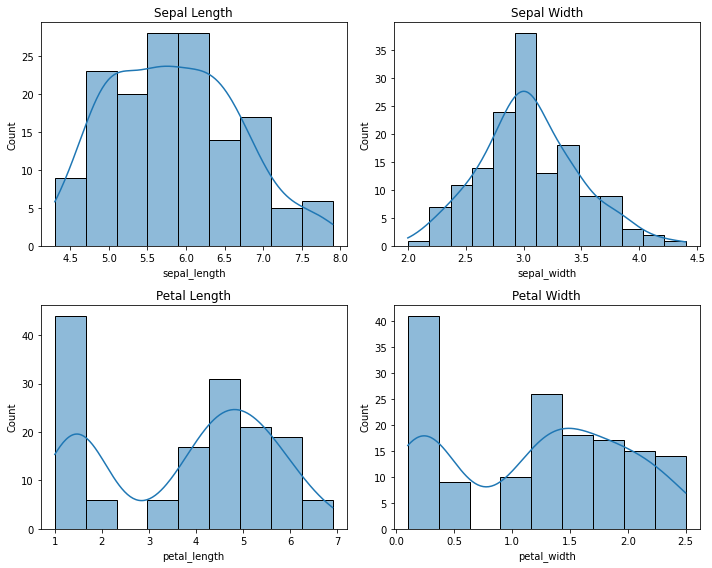

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot histograms with kernel density estimate (KDE) for each variable
sns.histplot(iris['sepal_length'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sepal Length')

sns.histplot(iris['sepal_width'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Sepal Width')

sns.histplot(iris['petal_length'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Petal Length')

sns.histplot(iris['petal_width'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Petal Width')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 0, 'sepal_length')

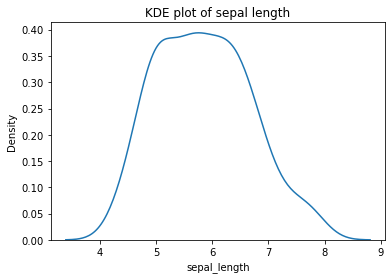

In [45]:
sns.kdeplot(iris["sepal_length"])

plt.title("KDE plot of sepal length")
plt.xlabel("sepal_length")

Text(0.5, 0, 'sepal_width')

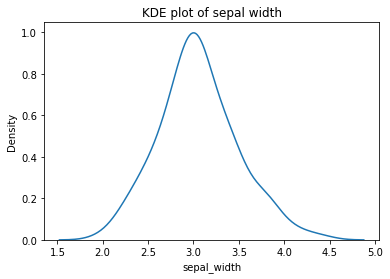

In [46]:
sns.kdeplot(iris["sepal_width"])

plt.title("KDE plot of sepal width")
plt.xlabel("sepal_width")

Text(0.5, 0, 'petal_length')

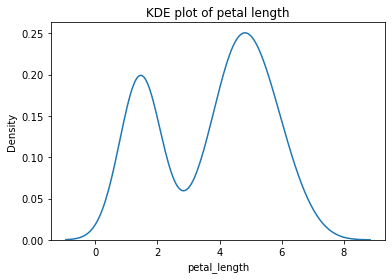

In [47]:
sns.kdeplot(iris["petal_length"])

plt.title("KDE plot of petal length")
plt.xlabel("petal_length")

## Distribution 

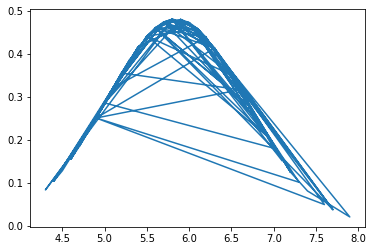

5.843333333333334
0.8280661279778629


In [48]:
# Calculating mean and standard deviation
mean = statistics.mean(iris["sepal_length"])
sd = statistics.stdev(iris["sepal_length"])
  
plt.plot(iris["sepal_length"], norm.pdf(iris["sepal_length"], mean, sd))
plt.show()
print(mean)
print(sd)

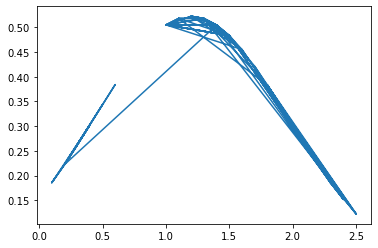

1.1986666666666668
0.7631607417008411


In [49]:
# Calculating mean and standard deviation
mean = statistics.mean(iris["petal_width"])
sd = statistics.stdev(iris["petal_width"])
  
plt.plot(iris["petal_width"], norm.pdf(iris["petal_width"], mean, sd))
plt.show()
print(mean)
print(sd)

## Standardization 

In [50]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
data.drop(["species"],inplace=True,axis=1)

In [52]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
std_scaler=StandardScaler()

df_scaled=std_scaler.fit_transform(data.to_numpy())
df_scaled=pd.DataFrame(df_scaled,columns=[
    'sepal_length','sepal_width','petal_length','petal_width'])
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
